**NAME**   : Ragul A C

**REG NO** : 212221240042


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.metrics import CategoricalCrossentropy
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

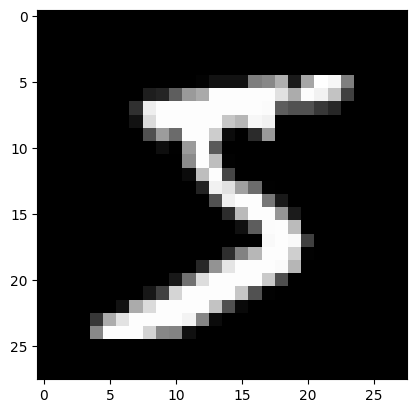

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train_onehot.shape

(60000, 10)

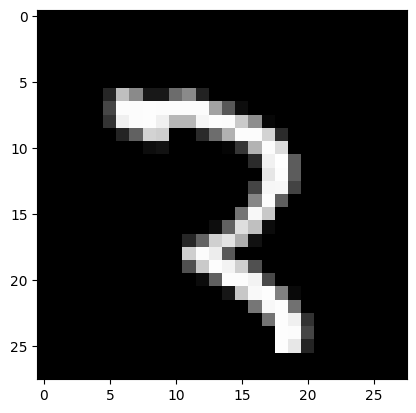

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
X_test_scaled.shape

(10000, 28, 28, 1)

In [ ]:
model = keras.Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
model.compile('adam', loss ='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train_onehot, epochs=20, validation_data = (X_test_scaled,y_test_onehot))

Epoch 1/20
1875/1875 [==============================] - 25s 9ms/step - loss: 0.6470 - accuracy: 0.7790 - val_loss: 0.1071 - val_accuracy: 0.9698
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3377 - accuracy: 0.8849 - val_loss: 0.0714 - val_accuracy: 0.9793
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2546 - accuracy: 0.9144 - val_loss: 0.0560 - val_accuracy: 0.9832
Epoch 4/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2095 - accuracy: 0.9323 - val_loss: 0.0464 - val_accuracy: 0.9862
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1825 - accuracy: 0.9417 - val_loss: 0.0411 - val_accuracy: 0.9887
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1666 - accuracy: 0.9467 - val_loss: 0.0446 - val_accuracy: 0.9861
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1546 - accuracy: 0.9504 - val_loss: 0.0402 - val_accura

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.646963,0.779033,0.107136,0.9698
1,0.337734,0.884850,0.071381,0.9793
2,0.254582,0.914450,0.056036,0.9832
3,0.209495,0.932350,0.046426,0.9862
4,0.182493,0.941717,0.041074,0.9887


<Axes: >

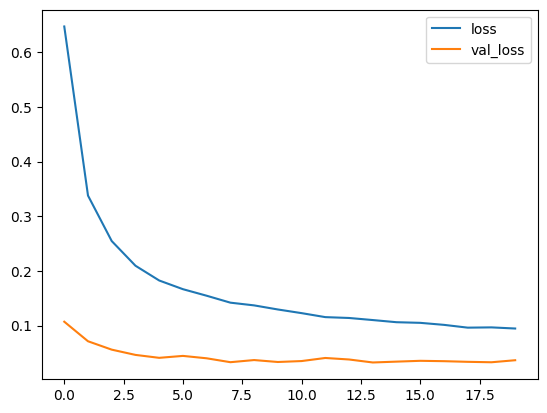

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

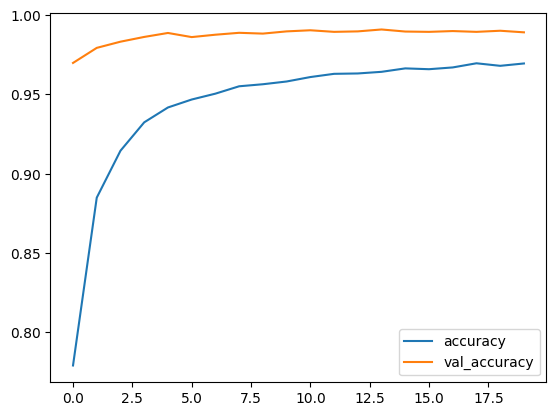

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
pred = np.argmax(model.predict(X_test),axis=1)

313/313 [==============================] - 1s 2ms/step


In [ ]:
pred[0:10]

array([7, 2, 1, 0, 4, 1, 4, 8, 5, 9])

In [ ]:
y_test[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [ ]:
print(type(y_test))
print(type(pred))
y_test = y_test.ravel()
pred=pred.ravel()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(confusion_matrix(y_test,pred))

[[ 862    4   15    4   35    4   38    2   11    5]
 [   0 1092    8    6    3    1    3    1   21    0]
 [   0    1 1016    6    0    0    0    7    2    0]
 [   0    0    1  998    0    6    0    2    3    0]
 [   0    0    0    0  962    0    6    1   11    2]
 [   0    0    0    8    0  872    2    0    9    1]
 [   0    1    1    0    6   11  930    0    9    0]
 [   0    2    7    2    2    0    0 1008    3    4]
 [   0    0    3    0    0    0    0    0  970    1]
 [   0    0    0    1   24    8    0    1   29  946]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       980
           1       0.99      0.96      0.98      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.93      0.98      0.96       982
           5       0.97      0.98      0.97       892
           6       0.95      0.97      0.96       958
           7       0.99      0.98      0.98      1028
           8       0.91      1.00      0.95       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
img = image.load_img('/content/5.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 166ms/step


In [ ]:
print(x_single_prediction)

[5]


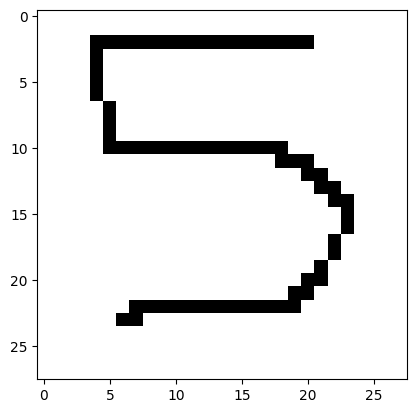

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 18ms/step


In [ ]:
print(x_single_prediction)

[5]
